In [1]:
import sys
import os
import pickle

from pathlib import Path
library_path = os.path.join('..', '..', '..', 'UCB-USACE-LSTMs')
sys.path.insert(0, library_path)

import pandas as pd

import matplotlib.pyplot as plt
import torch
from neuralhydrology.evaluation.metrics import *
from neuralhydrology.nh_run import start_run, eval_run, finetune
from neuralhydrology.utils.nh_results_ensemble import create_results_ensemble
from neuralhydrology.UCB_training.UCB_train import UCB_trainer
from neuralhydrology.evaluation.metrics import calculate_all_metrics

Quick check that working directory and train basin file exists:

In [3]:
print("Current Working Directory:", os.getcwd())
print("Train Basin File Exists:", os.path.exists("guerneville"))

Current Working Directory: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all
Train Basin File Exists: True


Train NON physics informed LSTM:

In [5]:
#adjust path to directory of daily csv
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/11082024_data_streamflow_met_Russian_River_share_UCB")
#adjust path to yaml file for relevant basin
path_to_yaml = Path("guerneville_gage.yaml")
params = {
    "epochs":32,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
lstmNoPhysics = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params)

In [6]:
lstmNoPhysics.train()

2024-12-18 10:42:13,196: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all\runs\testing_run_1812_104213\output.log initialized.
2024-12-18 10:42:13,199: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all\runs\testing_run_1812_104213
2024-12-18 10:42:13,202: ### Run configurations for testing_run
2024-12-18 10:42:13,205: experiment_name: testing_run
2024-12-18 10:42:13,206: train_basin_file: guerneville
2024-12-18 10:42:13,208: validation_basin_file: guerneville
2024-12-18 10:42:13,209: test_basin_file: guerneville
2024-12-18 10:42:13,210: train_start_date: 1994-10-01 00:00:00
2024-12-18 10:42:13,211: train_end_date: 2002-09-30 00:00:00
2024-12-18 10:42:13,213: validation_start_date: 2002-10-01 00:00:00
2024-12-18 10:42:13,216: validation_end_date: 2005-09-30 00:00:00
2024-12-18 10:42:13,218: test_start_date: 2005-10-01 00:00:00
2024-12-18 10:42:13,220: test_end_date: 2009-09-30 00:00:00
2024-12-18 10:42:13,222: device: cpu
2024-12-1

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]
2024-12-18 10:42:59,945: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all\runs\testing_run_1812_104213\test\model_epoch032\test_metrics.csv
2024-12-18 10:42:59,948: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all\runs\testing_run_1812_104213\test\model_epoch032\test_results.p


Using basin: Guerneville
Using target variable: NR GUERNEVILLE FLOW COE GRN


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please

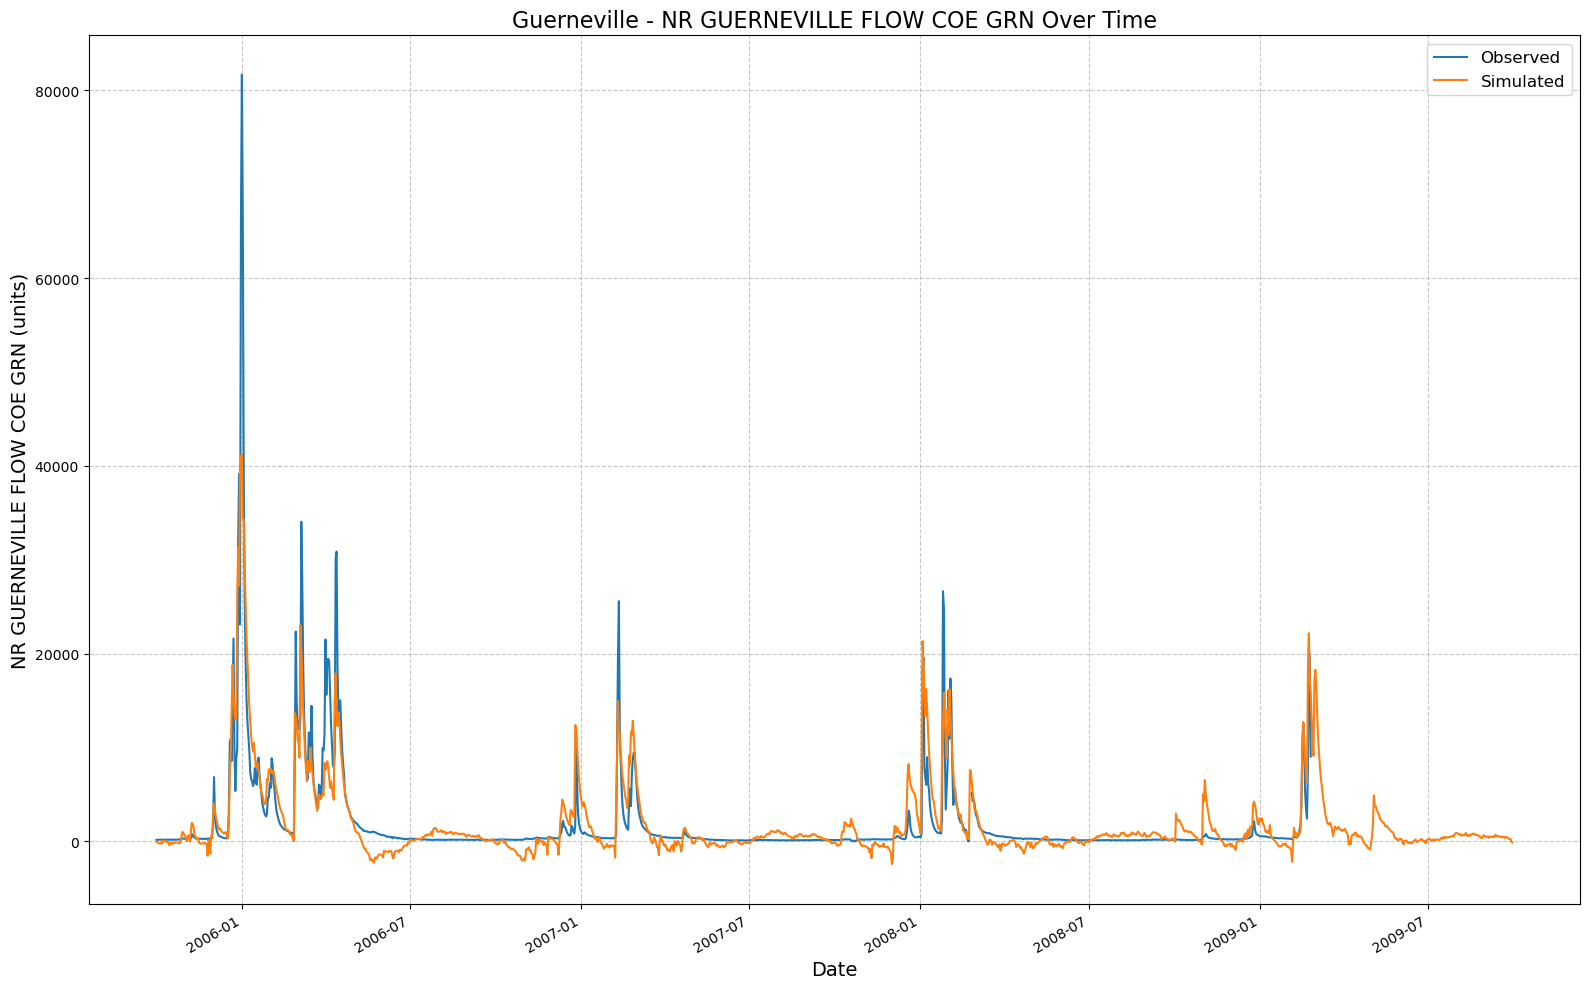

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all\runs\testing_run_1812_104213\results_output.csv


{'NSE': 0.7495134770870209,
 'MSE': 7715968.0,
 'RMSE': 2777.7631288502625,
 'KGE': 0.7895866095998973,
 'Alpha-NSE': 0.8378200190240447,
 'Beta-KGE': 1.0085490942001343,
 'Beta-NSE': 0.0029935333731925663,
 'Pearson-r': 0.8662152414560538,
 'FHV': -20.762717723846436,
 'FMS': 971.7819560470778,
 'FLV': 99.99999998545263,
 'Peak-Timing': 0.75,
 'Peak-MAPE': 43.600826263427734}

In [7]:
lstmNoPhysics.results()

Now run physics informed lstm with HMS data (without the reservoir storage):

In [9]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/11082024_data_streamflow_met_Russian_River_share_UCB")
path_to_yaml = Path("guerneville_gage.yaml")
path_to_physics_data = Path("F:/Dino/UCB-USACE-LSTMs/data/HMS_outputs_for_UCB/Guerneville_daily.csv")
params = {
    "epochs":32,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
features_with_physics = [
    #from daily.csv
    "BIG SULPHUR CR ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "DRY CREEK 10 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "EF RUSSIAN 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "GREEN VALLEY ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "LAGUNA ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 30 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 40 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 50 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 60 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 70 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "SANTA ROSA CR 10 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "SANTA ROSA CR 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "WF RUSSIAN ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "BIG SULPHUR CR PRECIP-INC SCREENED",
    "DRY CREEK 10 PRECIP-INC SCREENED",
    "EF RUSSIAN 20 PRECIP-INC SCREENED",
    "GREEN VALLEY PRECIP-INC SCREENED",
    "LAGUNA PRECIP-INC SCREENED",
    "RUSSIAN 20 PRECIP-INC SCREENED",
    "RUSSIAN 30 PRECIP-INC SCREENED",
    "RUSSIAN 40 PRECIP-INC SCREENED",
    "RUSSIAN 50 PRECIP-INC SCREENED",
    "RUSSIAN 60 PRECIP-INC SCREENED",
    "RUSSIAN 70 PRECIP-INC SCREENED",
    "SANTA ROSA CR 10 PRECIP-INC SCREENED",
    "SANTA ROSA CR 20 PRECIP-INC SCREENED",
    "WF RUSSIAN PRECIP-INC SCREENED",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "SANTA ROSA CA HUMIDITY USAF-NOAA",
    "SANTA ROSA CA SOLAR RADIATION USAF-NOAA",
    "SANTA ROSA CA TEMPERATURE USAF-NOAA",
    "SANTA ROSA CA WINDSPEED USAF-NOAA",
    "UKIAH CA FLOW USGS-MERGED",
    "GEYSERVILLE CA FLOW USGS-MERGED",
    #from guerneville.csv
    #'Guerneville Gage FLOW Guerneville',
    #'Big Sulphur Cr ET-POTENTIAL Guerneville',
    #'Big Sulphur Cr FLOW Guerneville',
    #'Big Sulphur Cr FLOW-BASE Guerneville',
    #'Big Sulphur Cr INFILTRATION Guerneville',
    #'Big Sulphur Cr PERC-SOIL Guerneville',
    #'Big Sulphur Cr SATURATION FRACTION Guerneville',
    #'Dry Creek 10 ET-POTENTIAL Guerneville',
    #'Dry Creek 10 FLOW Guerneville', 
    #'Dry Creek 10 FLOW-BASE Guerneville',
    #'Dry Creek 10 INFILTRATION Guerneville',
    #'Dry Creek 10 PERC-SOIL Guerneville',
    #'Dry Creek 10 SATURATION FRACTION Guerneville',
    #'Green Valley ET-POTENTIAL Guerneville',
    #'Green Valley FLOW Guerneville', 
    #'Green Valley FLOW-BASE Guerneville',
    #'Green Valley INFILTRATION Guerneville',
    #'Green Valley PERC-SOIL Guerneville',
    #'Green Valley SATURATION FRACTION Guerneville',
    #'Laguna ET-POTENTIAL Guerneville', 
    #'Laguna FLOW Guerneville',
    #'Laguna FLOW-BASE Guerneville', 
    #'Laguna INFILTRATION Guerneville',
    #'Laguna PERC-SOIL Guerneville',
    #'Laguna SATURATION FRACTION Guerneville',
    #'Russian 20 ET-POTENTIAL Guerneville', 
    #'Russian 20 FLOW Guerneville',
    #'Russian 20 FLOW-BASE Guerneville',
    #'Russian 20 INFILTRATION Guerneville',
    #'Russian 20 PERC-SOIL Guerneville',
    #'Russian 20 SATURATION FRACTION Guerneville',
    #'Russian 30 ET-POTENTIAL Guerneville', 
    #'Russian 30 FLOW Guerneville',
    #'Russian 30 FLOW-BASE Guerneville',
    #'Russian 30 INFILTRATION Guerneville',
    #'Russian 30 PERC-SOIL Guerneville',
    #'Russian 30 SATURATION FRACTION Guerneville',
    #'Russian 40 ET-POTENTIAL Guerneville', 
    #'Russian 40 FLOW Guerneville',
    #'Russian 40 FLOW-BASE Guerneville',
    #'Russian 40 INFILTRATION Guerneville',
    #'Russian 40 PERC-SOIL Guerneville',
    #'Russian 40 SATURATION FRACTION Guerneville',
    #'Russian 50 ET-POTENTIAL Guerneville', 
    #'Russian 50 FLOW Guerneville',
    #'Russian 50 FLOW-BASE Guerneville',
    #'Russian 50 INFILTRATION Guerneville',
    #'Russian 50 PERC-SOIL Guerneville',
    #'Russian 50 SATURATION FRACTION Guerneville',
    #'Russian 60 ET-POTENTIAL Guerneville', 
    #'Russian 60 FLOW Guerneville',
    #'Russian 60 FLOW-BASE Guerneville',
    #'Russian 60 INFILTRATION Guerneville',
    #'Russian 60 PERC-SOIL Guerneville',
    #'Russian 60 SATURATION FRACTION Guerneville',
    #'Russian 70 ET-POTENTIAL Guerneville', 
    #'Russian 70 FLOW Guerneville',
    #'Russian 70 FLOW-BASE Guerneville',
    #'Russian 70 INFILTRATION Guerneville',
    #'Russian 70 PERC-SOIL Guerneville',
    #'Russian 70 SATURATION FRACTION Guerneville',
    #'Santa Rosa Cr 10 ET-POTENTIAL Guerneville',
    #'Santa Rosa Cr 10 FLOW Guerneville',
    #'Santa Rosa Cr 10 FLOW-BASE Guerneville',
    #'Santa Rosa Cr 10 INFILTRATION Guerneville',
    #'Santa Rosa Cr 10 PERC-SOIL Guerneville',
    #'Santa Rosa Cr 10 SATURATION FRACTION Guerneville',
    #'Santa Rosa Cr 20 ET-POTENTIAL Guerneville',
    #'Santa Rosa Cr 20 FLOW Guerneville',
    #'Santa Rosa Cr 20 FLOW-BASE Guerneville',
    #'Santa Rosa Cr 20 INFILTRATION Guerneville',
    #'Santa Rosa Cr 20 PERC-SOIL Guerneville',
    #'Santa Rosa Cr 20 SATURATION FRACTION Guerneville',
    #'WF Russian ET-POTENTIAL Guerneville', 
    #'WF Russian FLOW Guerneville',
    # from new Guernerville.csv
    "Guerneville Gage FLOW",	
    "Big Sulphur Cr ET-POTENTIAL",	
    "Big Sulphur Cr FLOW",	
    "Big Sulphur Cr FLOW-BASE",	
    "Big Sulphur Cr INFILTRATION",	
    "Big Sulphur Cr PERC-SOIL",	
    "Big Sulphur Cr SATURATION FRACTION",	
    "Dry Creek 10 ET-POTENTIAL",	
    "Dry Creek 10 FLOW",	
    "Dry Creek 10 FLOW-BASE",	
    "Dry Creek 10 INFILTRATION",	
    "Dry Creek 10 PERC-SOIL",	
    "Dry Creek 10 SATURATION FRACTION",	
    "Green Valley ET-POTENTIAL",	
    "Green Valley FLOW",	
    "Green Valley FLOW-BASE",	
    "Green Valley INFILTRATION",	
    "Green Valley PERC-SOIL",	
    "Green Valley SATURATION FRACTION",	
    "Laguna ET-POTENTIAL",	
    "Laguna FLOW",	
    "Laguna FLOW-BASE",	
    "Laguna INFILTRATION",	
    "Laguna PERC-SOIL",	
    "Laguna SATURATION FRACTION",	
    "Russian 20 ET-POTENTIAL",	
    "Russian 20 FLOW",	
    "Russian 20 FLOW-BASE",	
    "Russian 20 INFILTRATION",	
    "Russian 20 PERC-SOIL",	
    "Russian 20 SATURATION FRACTION",	
    "Russian 30 ET-POTENTIAL",	
    "Russian 30 FLOW",	
    "Russian 30 FLOW-BASE",	
    "Russian 30 INFILTRATION",	
    "Russian 30 PERC-SOIL",	
    "Russian 30 SATURATION FRACTION",	
    "Russian 40 ET-POTENTIAL",	
    "Russian 40 FLOW",	
    "Russian 40 FLOW-BASE",	
    "Russian 40 INFILTRATION",	
    "Russian 40 PERC-SOIL",	
    "Russian 40 SATURATION FRACTION",	
    "Russian 50 ET-POTENTIAL",	
    "Russian 50 FLOW",	
    "Russian 50 FLOW-BASE",	
    "Russian 50 INFILTRATION",	
    "Russian 50 PERC-SOIL",	
    "Russian 50 SATURATION FRACTION",	
    "Russian 60 ET-POTENTIAL",	
    "Russian 60 FLOW",	
    "Russian 60 FLOW-BASE",	
    "Russian 60 INFILTRATION",	
    "Russian 60 PERC-SOIL",	
    "Russian 60 SATURATION FRACTION",	
    "Russian 70 ET-POTENTIAL",	
    "Russian 70 FLOW",	
    "Russian 70 FLOW-BASE",	
    "Russian 70 INFILTRATION",	
    "Russian 70 PERC-SOIL",	
    "Russian 70 SATURATION FRACTION",	
    "Santa Rosa Cr 10 ET-POTENTIAL",	
    "Santa Rosa Cr 10 FLOW",	
    "Santa Rosa Cr 10 FLOW-BASE",	
    "Santa Rosa Cr 10 INFILTRATION",	
    "Santa Rosa Cr 10 PERC-SOIL",	
    "Santa Rosa Cr 10 SATURATION FRACTION",	
    "Santa Rosa Cr 20 ET-POTENTIAL",	
    "Santa Rosa Cr 20 FLOW",	
    "Santa Rosa Cr 20 FLOW-BASE",	
    "Santa Rosa Cr 20 INFILTRATION",	
    "Santa Rosa Cr 20 PERC-SOIL",	
    "Santa Rosa Cr 20 SATURATION FRACTION",	
    "WF Russian ET-POTENTIAL",	
    "WF Russian FLOW",	
    "WF Russian FLOW-BASE",	
    "WF Russian INFILTRATION",	
    "WF Russian PERC-SOIL",	
    "WF Russian SATURATION FRACTION",
    #"Lake Sonoma Storage",
    #"Lake Mendocino Storage",    
    ]
lstmPhysics = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data)

In [10]:
lstmPhysics.train()

2024-12-18 10:43:00,768: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all\runs\testing_run_1812_104300\output.log initialized.
2024-12-18 10:43:00,771: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all\runs\testing_run_1812_104300
2024-12-18 10:43:00,773: ### Run configurations for testing_run
2024-12-18 10:43:00,774: experiment_name: testing_run
2024-12-18 10:43:00,777: train_basin_file: guerneville
2024-12-18 10:43:00,779: validation_basin_file: guerneville
2024-12-18 10:43:00,780: test_basin_file: guerneville
2024-12-18 10:43:00,782: train_start_date: 1994-10-01 00:00:00
2024-12-18 10:43:00,783: train_end_date: 2002-09-30 00:00:00
2024-12-18 10:43:00,784: validation_start_date: 2002-10-01 00:00:00
2024-12-18 10:43:00,785: validation_end_date: 2005-09-30 00:00:00
2024-12-18 10:43:00,787: test_start_date: 2005-10-01 00:00:00
2024-12-18 10:43:00,788: test_end_date: 2009-09-30 00:00:00
2024-12-18 10:43:00,790: device: cpu
2024-12-1

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]
2024-12-18 10:43:48,177: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all\runs\testing_run_1812_104300\test\model_epoch032\test_metrics.csv
2024-12-18 10:43:48,179: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all\runs\testing_run_1812_104300\test\model_epoch032\test_results.p


Using basin: Guerneville
Using target variable: NR GUERNEVILLE FLOW COE GRN


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please

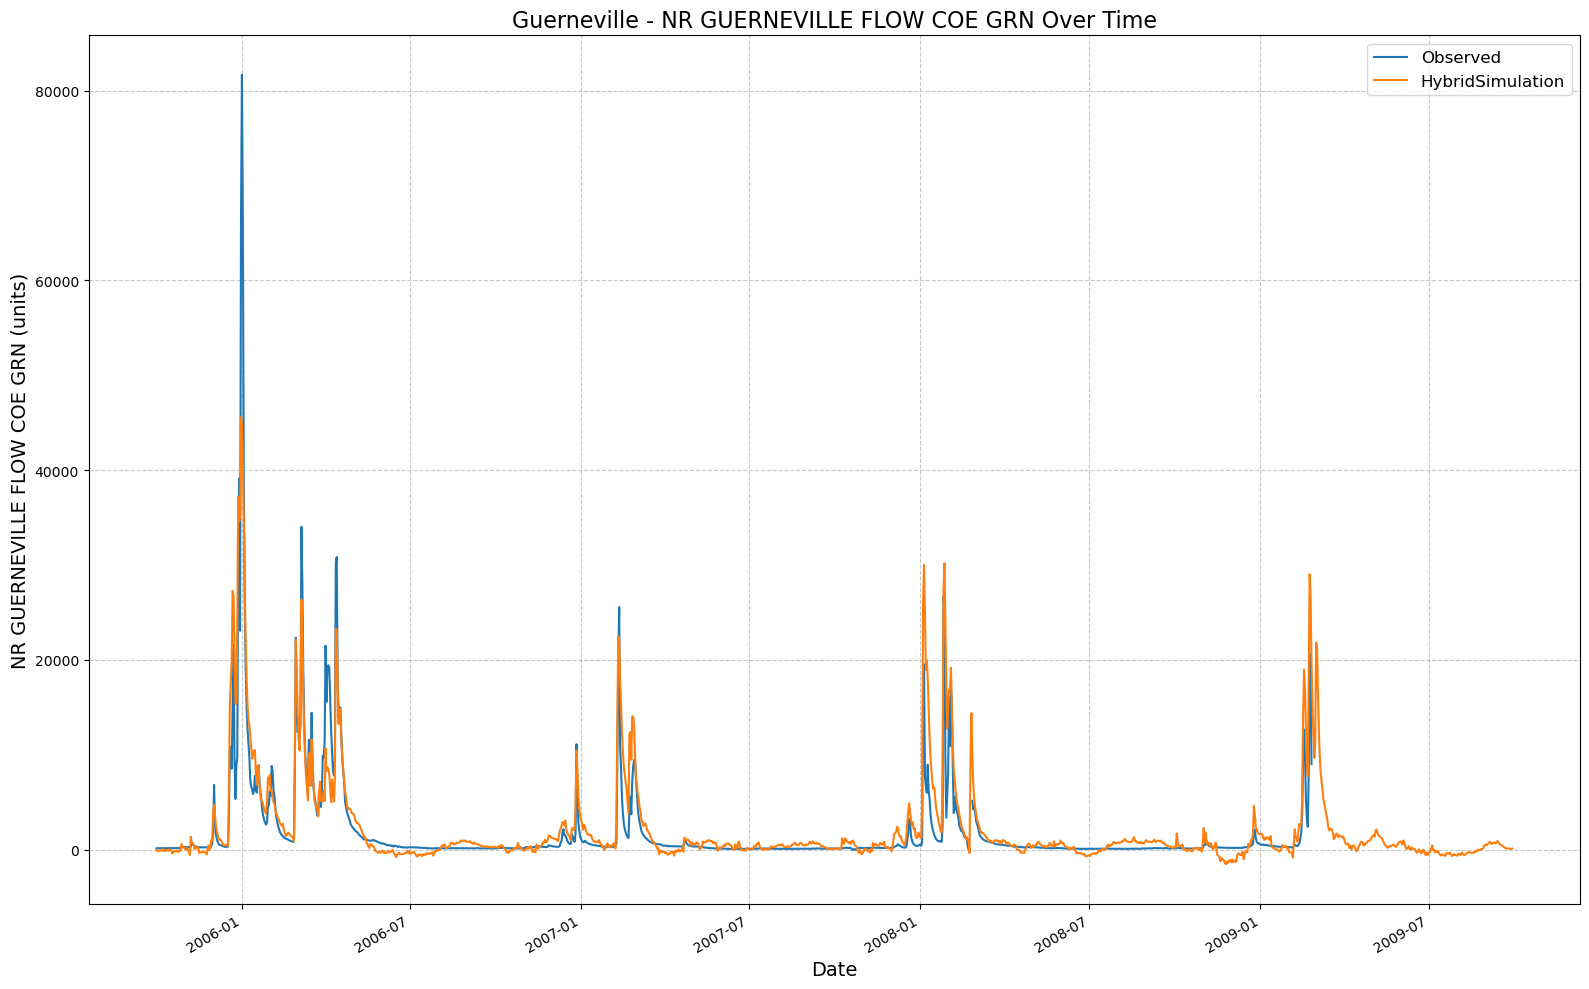

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all\runs\testing_run_1812_104300\results_output.csv


{'NSE': 0.783963531255722,
 'MSE': 6654771.0,
 'RMSE': 2579.684283008291,
 'KGE': 0.7520945636024758,
 'Alpha-NSE': 0.9735128183562677,
 'Beta-KGE': 1.2218098640441895,
 'Beta-NSE': 0.07766812138790365,
 'Pearson-r': 0.8925015403983991,
 'FHV': -4.843994602560997,
 'FMS': 25.0129683938395,
 'FLV': 70.03047061489245,
 'Peak-Timing': 1.0,
 'Peak-MAPE': 25.299267768859863}

In [11]:
lstmPhysics.results()

Now run physics informed lstm with HMS data (with the reservoir storage from Mendocino - Sonoma is incomplete):

In [13]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/11082024_data_streamflow_met_Russian_River_share_UCB")
path_to_yaml = Path("guerneville_gage.yaml")
path_to_physics_data = Path("F:/Dino/UCB-USACE-LSTMs/data/HMS_outputs_for_UCB/Guerneville_daily.csv")
params = {
    "epochs":32,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
features_with_physics = [
    #from daily.csv
    "BIG SULPHUR CR ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "DRY CREEK 10 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "EF RUSSIAN 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "GREEN VALLEY ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "LAGUNA ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 30 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 40 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 50 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 60 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 70 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "SANTA ROSA CR 10 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "SANTA ROSA CR 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "WF RUSSIAN ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "BIG SULPHUR CR PRECIP-INC SCREENED",
    "DRY CREEK 10 PRECIP-INC SCREENED",
    "EF RUSSIAN 20 PRECIP-INC SCREENED",
    "GREEN VALLEY PRECIP-INC SCREENED",
    "LAGUNA PRECIP-INC SCREENED",
    "RUSSIAN 20 PRECIP-INC SCREENED",
    "RUSSIAN 30 PRECIP-INC SCREENED",
    "RUSSIAN 40 PRECIP-INC SCREENED",
    "RUSSIAN 50 PRECIP-INC SCREENED",
    "RUSSIAN 60 PRECIP-INC SCREENED",
    "RUSSIAN 70 PRECIP-INC SCREENED",
    "SANTA ROSA CR 10 PRECIP-INC SCREENED",
    "SANTA ROSA CR 20 PRECIP-INC SCREENED",
    "WF RUSSIAN PRECIP-INC SCREENED",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "SANTA ROSA CA HUMIDITY USAF-NOAA",
    "SANTA ROSA CA SOLAR RADIATION USAF-NOAA",
    "SANTA ROSA CA TEMPERATURE USAF-NOAA",
    "SANTA ROSA CA WINDSPEED USAF-NOAA",
    "UKIAH CA FLOW USGS-MERGED",
    "GEYSERVILLE CA FLOW USGS-MERGED",
    #from guerneville.csv
    #'Guerneville Gage FLOW Guerneville',
    #'Big Sulphur Cr ET-POTENTIAL Guerneville',
    #'Big Sulphur Cr FLOW Guerneville',
    #'Big Sulphur Cr FLOW-BASE Guerneville',
    #'Big Sulphur Cr INFILTRATION Guerneville',
    #'Big Sulphur Cr PERC-SOIL Guerneville',
    #'Big Sulphur Cr SATURATION FRACTION Guerneville',
    #'Dry Creek 10 ET-POTENTIAL Guerneville',
    #'Dry Creek 10 FLOW Guerneville', 
    #'Dry Creek 10 FLOW-BASE Guerneville',
    #'Dry Creek 10 INFILTRATION Guerneville',
    #'Dry Creek 10 PERC-SOIL Guerneville',
    #'Dry Creek 10 SATURATION FRACTION Guerneville',
    #'Green Valley ET-POTENTIAL Guerneville',
    #'Green Valley FLOW Guerneville', 
    #'Green Valley FLOW-BASE Guerneville',
    #'Green Valley INFILTRATION Guerneville',
    #'Green Valley PERC-SOIL Guerneville',
    #'Green Valley SATURATION FRACTION Guerneville',
    #'Laguna ET-POTENTIAL Guerneville', 
    #'Laguna FLOW Guerneville',
    #'Laguna FLOW-BASE Guerneville', 
    #'Laguna INFILTRATION Guerneville',
    #'Laguna PERC-SOIL Guerneville',
    #'Laguna SATURATION FRACTION Guerneville',
    #'Russian 20 ET-POTENTIAL Guerneville', 
    #'Russian 20 FLOW Guerneville',
    #'Russian 20 FLOW-BASE Guerneville',
    #'Russian 20 INFILTRATION Guerneville',
    #'Russian 20 PERC-SOIL Guerneville',
    #'Russian 20 SATURATION FRACTION Guerneville',
    #'Russian 30 ET-POTENTIAL Guerneville', 
    #'Russian 30 FLOW Guerneville',
    #'Russian 30 FLOW-BASE Guerneville',
    #'Russian 30 INFILTRATION Guerneville',
    #'Russian 30 PERC-SOIL Guerneville',
    #'Russian 30 SATURATION FRACTION Guerneville',
    #'Russian 40 ET-POTENTIAL Guerneville', 
    #'Russian 40 FLOW Guerneville',
    #'Russian 40 FLOW-BASE Guerneville',
    #'Russian 40 INFILTRATION Guerneville',
    #'Russian 40 PERC-SOIL Guerneville',
    #'Russian 40 SATURATION FRACTION Guerneville',
    #'Russian 50 ET-POTENTIAL Guerneville', 
    #'Russian 50 FLOW Guerneville',
    #'Russian 50 FLOW-BASE Guerneville',
    #'Russian 50 INFILTRATION Guerneville',
    #'Russian 50 PERC-SOIL Guerneville',
    #'Russian 50 SATURATION FRACTION Guerneville',
    #'Russian 60 ET-POTENTIAL Guerneville', 
    #'Russian 60 FLOW Guerneville',
    #'Russian 60 FLOW-BASE Guerneville',
    #'Russian 60 INFILTRATION Guerneville',
    #'Russian 60 PERC-SOIL Guerneville',
    #'Russian 60 SATURATION FRACTION Guerneville',
    #'Russian 70 ET-POTENTIAL Guerneville', 
    #'Russian 70 FLOW Guerneville',
    #'Russian 70 FLOW-BASE Guerneville',
    #'Russian 70 INFILTRATION Guerneville',
    #'Russian 70 PERC-SOIL Guerneville',
    #'Russian 70 SATURATION FRACTION Guerneville',
    #'Santa Rosa Cr 10 ET-POTENTIAL Guerneville',
    #'Santa Rosa Cr 10 FLOW Guerneville',
    #'Santa Rosa Cr 10 FLOW-BASE Guerneville',
    #'Santa Rosa Cr 10 INFILTRATION Guerneville',
    #'Santa Rosa Cr 10 PERC-SOIL Guerneville',
    #'Santa Rosa Cr 10 SATURATION FRACTION Guerneville',
    #'Santa Rosa Cr 20 ET-POTENTIAL Guerneville',
    #'Santa Rosa Cr 20 FLOW Guerneville',
    #'Santa Rosa Cr 20 FLOW-BASE Guerneville',
    #'Santa Rosa Cr 20 INFILTRATION Guerneville',
    #'Santa Rosa Cr 20 PERC-SOIL Guerneville',
    #'Santa Rosa Cr 20 SATURATION FRACTION Guerneville',
    #'WF Russian ET-POTENTIAL Guerneville', 
    #'WF Russian FLOW Guerneville',
    # from new Guernerville.csv
    "Guerneville Gage FLOW",	
    "Big Sulphur Cr ET-POTENTIAL",	
    "Big Sulphur Cr FLOW",	
    "Big Sulphur Cr FLOW-BASE",	
    "Big Sulphur Cr INFILTRATION",	
    "Big Sulphur Cr PERC-SOIL",	
    "Big Sulphur Cr SATURATION FRACTION",	
    "Dry Creek 10 ET-POTENTIAL",	
    "Dry Creek 10 FLOW",	
    "Dry Creek 10 FLOW-BASE",	
    "Dry Creek 10 INFILTRATION",	
    "Dry Creek 10 PERC-SOIL",	
    "Dry Creek 10 SATURATION FRACTION",	
    "Green Valley ET-POTENTIAL",	
    "Green Valley FLOW",	
    "Green Valley FLOW-BASE",	
    "Green Valley INFILTRATION",	
    "Green Valley PERC-SOIL",	
    "Green Valley SATURATION FRACTION",	
    "Laguna ET-POTENTIAL",	
    "Laguna FLOW",	
    "Laguna FLOW-BASE",	
    "Laguna INFILTRATION",	
    "Laguna PERC-SOIL",	
    "Laguna SATURATION FRACTION",	
    "Russian 20 ET-POTENTIAL",	
    "Russian 20 FLOW",	
    "Russian 20 FLOW-BASE",	
    "Russian 20 INFILTRATION",	
    "Russian 20 PERC-SOIL",	
    "Russian 20 SATURATION FRACTION",	
    "Russian 30 ET-POTENTIAL",	
    "Russian 30 FLOW",	
    "Russian 30 FLOW-BASE",	
    "Russian 30 INFILTRATION",	
    "Russian 30 PERC-SOIL",	
    "Russian 30 SATURATION FRACTION",	
    "Russian 40 ET-POTENTIAL",	
    "Russian 40 FLOW",	
    "Russian 40 FLOW-BASE",	
    "Russian 40 INFILTRATION",	
    "Russian 40 PERC-SOIL",	
    "Russian 40 SATURATION FRACTION",	
    "Russian 50 ET-POTENTIAL",	
    "Russian 50 FLOW",	
    "Russian 50 FLOW-BASE",	
    "Russian 50 INFILTRATION",	
    "Russian 50 PERC-SOIL",	
    "Russian 50 SATURATION FRACTION",	
    "Russian 60 ET-POTENTIAL",	
    "Russian 60 FLOW",	
    "Russian 60 FLOW-BASE",	
    "Russian 60 INFILTRATION",	
    "Russian 60 PERC-SOIL",	
    "Russian 60 SATURATION FRACTION",	
    "Russian 70 ET-POTENTIAL",	
    "Russian 70 FLOW",	
    "Russian 70 FLOW-BASE",	
    "Russian 70 INFILTRATION",	
    "Russian 70 PERC-SOIL",	
    "Russian 70 SATURATION FRACTION",	
    "Santa Rosa Cr 10 ET-POTENTIAL",	
    "Santa Rosa Cr 10 FLOW",	
    "Santa Rosa Cr 10 FLOW-BASE",	
    "Santa Rosa Cr 10 INFILTRATION",	
    "Santa Rosa Cr 10 PERC-SOIL",	
    "Santa Rosa Cr 10 SATURATION FRACTION",	
    "Santa Rosa Cr 20 ET-POTENTIAL",	
    "Santa Rosa Cr 20 FLOW",	
    "Santa Rosa Cr 20 FLOW-BASE",	
    "Santa Rosa Cr 20 INFILTRATION",	
    "Santa Rosa Cr 20 PERC-SOIL",	
    "Santa Rosa Cr 20 SATURATION FRACTION",	
    "WF Russian ET-POTENTIAL",	
    "WF Russian FLOW",	
    "WF Russian FLOW-BASE",	
    "WF Russian INFILTRATION",	
    "WF Russian PERC-SOIL",	
    "WF Russian SATURATION FRACTION",
    #"Lake Sonoma Storage",
    "Lake Mendocino Storage",    
    ]
lstmPhysics = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data)


In [14]:
lstmPhysics.train()

2024-12-18 10:43:48,999: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all\runs\testing_run_1812_104348\output.log initialized.
2024-12-18 10:43:49,000: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all\runs\testing_run_1812_104348
2024-12-18 10:43:49,001: ### Run configurations for testing_run
2024-12-18 10:43:49,004: experiment_name: testing_run
2024-12-18 10:43:49,006: train_basin_file: guerneville
2024-12-18 10:43:49,007: validation_basin_file: guerneville
2024-12-18 10:43:49,009: test_basin_file: guerneville
2024-12-18 10:43:49,011: train_start_date: 1994-10-01 00:00:00
2024-12-18 10:43:49,013: train_end_date: 2002-09-30 00:00:00
2024-12-18 10:43:49,016: validation_start_date: 2002-10-01 00:00:00
2024-12-18 10:43:49,018: validation_end_date: 2005-09-30 00:00:00
2024-12-18 10:43:49,020: test_start_date: 2005-10-01 00:00:00
2024-12-18 10:43:49,022: test_end_date: 2009-09-30 00:00:00
2024-12-18 10:43:49,024: device: cpu
2024-12-1

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self

# Evaluation: 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]
2024-12-18 10:44:41,780: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all\runs\testing_run_1812_104348\test\model_epoch032\test_metrics.csv
2024-12-18 10:44:41,783: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all\runs\testing_run_1812_104348\test\model_epoch032\test_results.p


Using basin: Guerneville
Using target variable: NR GUERNEVILLE FLOW COE GRN


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please

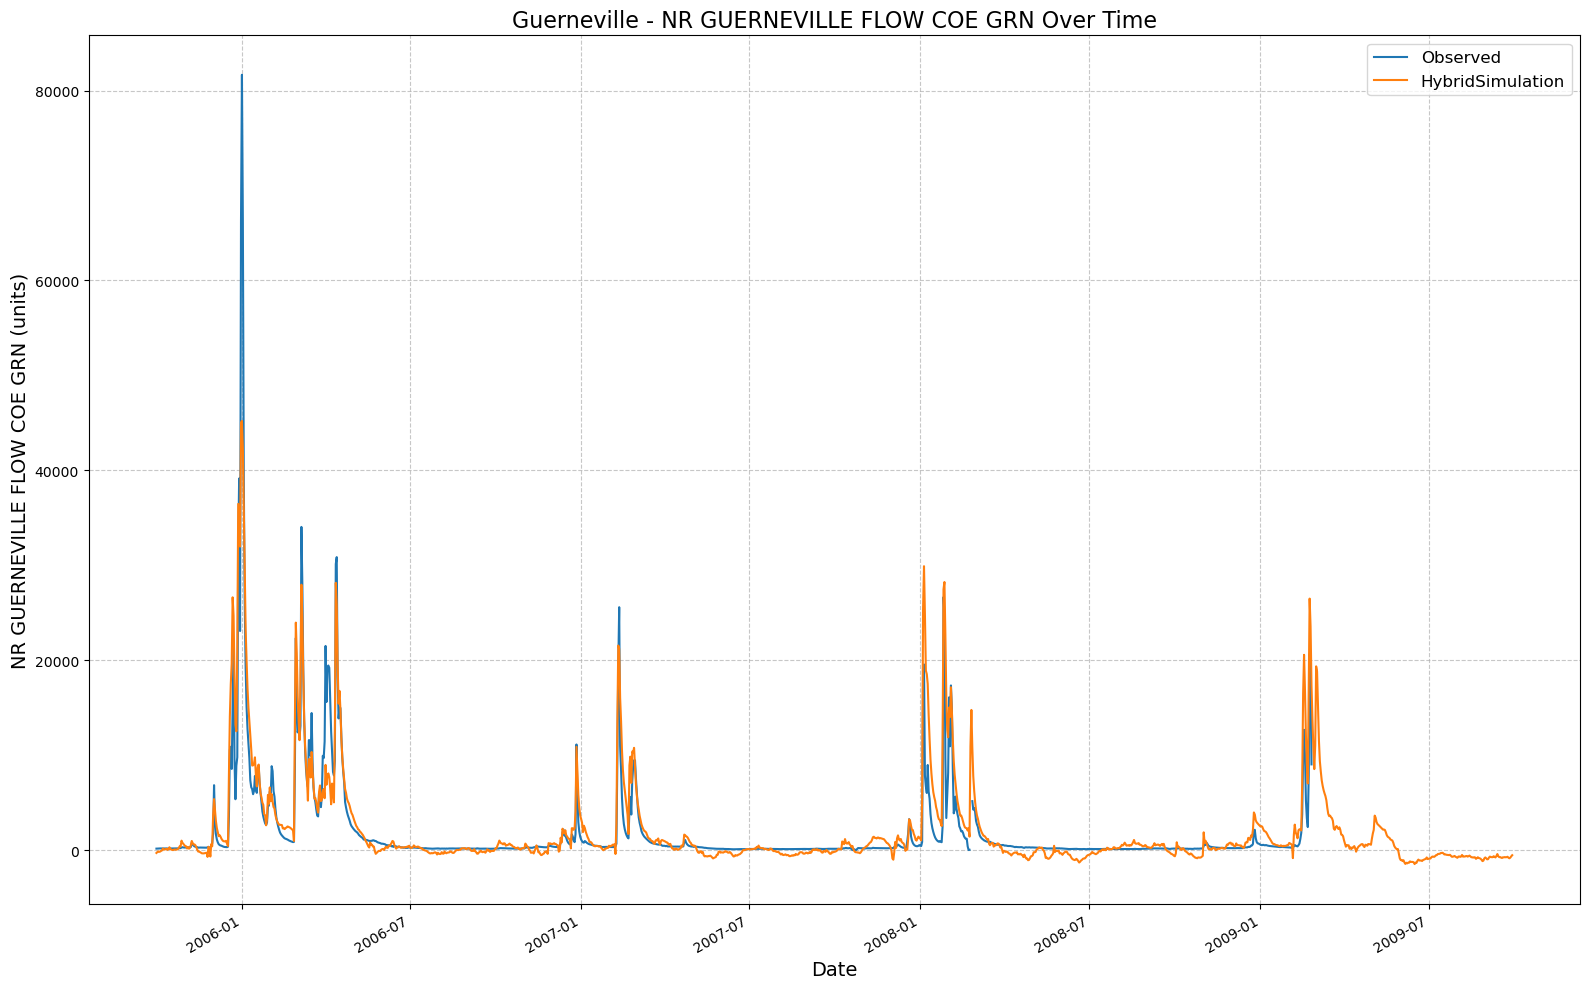

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all\runs\testing_run_1812_104348\results_output.csv


{'NSE': 0.8088740259408951,
 'MSE': 5887430.5,
 'RMSE': 2426.4027901401696,
 'KGE': 0.8283271780932044,
 'Alpha-NSE': 0.9708641969660766,
 'Beta-KGE': 1.1387687921524048,
 'Beta-NSE': 0.04859077875767991,
 'Pearson-r': 0.9032224969965981,
 'FHV': -5.307843163609505,
 'FMS': 203.8033152066185,
 'FLV': 98.73387473010784,
 'Peak-Timing': 0.75,
 'Peak-MAPE': 21.873416900634766}

In [15]:
lstmPhysics.results()

Now, combine the results for the normal lstm, physics informed lstm and the hms results on one graph over a specified time period (the test period).

In [28]:
import xarray as xr

In [30]:
def combinedPlot(lstm_results: Path, lstmPhysics_results: Path, HMS_results: Path, title: str, 
                 test_start_date="01/10/2005", test_end_date="30/09/2009"):
    model1_df = pd.read_csv(lstm_results) #colums: Date, Observed, Predicted
    model2_df = pd.read_csv(lstmPhysics_results) #colums: Date, Observed, Predicted
    model1_df = model1_df.rename(columns={
        'Date': 'date',
        'Observed': 'Observed_Model1',
        'Predicted': 'Predicted_Model1'
    })
    model1_df['date'] = pd.to_datetime(model1_df['date'])

    # Set all negative values in the Predicted_Model1 column to zero
    model1_df.loc[model1_df['Predicted_Model1'] < 0, 'Predicted_Model1'] = 0

    model2_df = model2_df.rename(columns={
        'Date': 'date',
        'Observed': 'Observed_Model2',
        'Predicted': 'Predicted_Model2'
    })
    model2_df['date'] = pd.to_datetime(model2_df['date'])

    # Set all negative values in the Predicted_Model2 column to zero
    model2_df.loc[model2_df['Predicted_Model2'] < 0, 'Predicted_Model2'] = 0
    
    #This just gets the HMS prediceted values from the physics csv
    hms_df = pd.read_csv(HMS_results)
    hms_df = hms_df[3:]
    hms_df.columns = hms_df.columns.str.strip()
    hms_df = hms_df.drop(columns=['Ordinate'])
    hms_df = hms_df.rename(columns={'Date / Time': 'date'})
    hms_df['date'] = pd.to_datetime(hms_df['date'], format='%d-%b-%y')
    hms_df = hms_df.reset_index(drop=True)
    hms_df = hms_df.iloc[:, [0,1]] #Date, HMS predicted
    hms_df = hms_df.rename(columns={hms_df.columns[1]: "HMS_predicted"})
    hms_df["HMS_predicted"] = pd.to_numeric(hms_df["HMS_predicted"], errors="coerce")

    df = model1_df.merge(model2_df, how='right', on='date').merge(hms_df, how='right', on='date')

    # Filter for the test period
    test_start_date = pd.to_datetime("2005-10-01")
    test_end_date = pd.to_datetime("2009-09-30")
    df = df[(df['date'] >= test_start_date) & (df['date'] <= test_end_date)]

    # Convert pandas Series to xarray DataArray with a datetime coordinate
    obs_da = xr.DataArray(df['Observed_Model1'].values, dims=["date"], coords={"date": df['date']})
    sim_da_hms = xr.DataArray(df['HMS_predicted'].values, dims=["date"], coords={"date": df['date']})
    sim_da_lstm = xr.DataArray(df['Predicted_Model1'].values, dims=["date"], coords={"date": df['date']})
    sim_da_physics = xr.DataArray(df['Predicted_Model2'].values, dims=["date"], coords={"date": df['date']})

    # Collect metrics into a dictionary
    metrics = {
        "HMS": calculate_all_metrics(obs_da, sim_da_hms),
        "LSTM": calculate_all_metrics(obs_da, sim_da_lstm),
        "Physics_Informed_LSTM": calculate_all_metrics(obs_da, sim_da_physics),
    }

    metrics_df = pd.DataFrame(metrics)
    output_csv_path = "guerneville_metrics.csv"
    metrics_df.to_csv(output_csv_path)

    # Plot all columns against the "date_col" (x-axis)
    plt.figure(figsize=(30, 10))
    
    plt.plot(df["date"], df["Observed_Model1"], label='Observed', linewidth=2)
    plt.plot(df["date"], df["HMS_predicted"], label='HMS Prediction',  linewidth=2, alpha=0.7)
    plt.plot(df["date"], df["Predicted_Model1"], label='LSTM Prediction', linewidth=2, alpha=0.8)
    plt.plot(df["date"], df["Predicted_Model2"], label='Physics Informed LSTM Prediction', linewidth=2, alpha=0.7)
    
    # Customize the plot
    plt.tick_params(axis='x', labelsize=15)  # For x-axis tick labels
    plt.tick_params(axis='y', labelsize=15) 
    plt.xlabel("Date", fontsize=20)
    plt.ylabel("Inflow (cubic feet per second)", fontsize=20)
    plt.title(title, fontsize=30)
    plt.legend(fontsize=25, loc="upper right")
    plt.grid(True, alpha=0.4)

    plt.xlim(test_start_date, test_end_date)

    #plt.gcf.autofmt_xdate()
    plt.tight_layout()
    plt.show()

    return plt

In [32]:
#change the paths to the respective ouptut csvs from running the result method
lstm_result_path = Path("F:/Dino/UCB-USACE-LSTMs/neuralhydrology/guerneville_all/runs/testing_run_1212_095222/results_output.csv")
physics_informed_result_path = Path("F:/Dino/UCB-USACE-LSTMs/neuralhydrology/guerneville_all/runs/testing_run_1812_104213/results_output.csv")
path_to_physics_data = Path("F:/Dino/UCB-USACE-LSTMs/data/HMS_outputs_for_UCB/Guerneville_daily.csv")
myplot = combinedPlot(lstm_results=lstm_result_path, lstmPhysics_results= physics_informed_result_path, HMS_results=path_to_physics_data, title='Guerneville Basin Model Comparison')

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\guerneville_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please

PermissionError: [Errno 13] Permission denied: 'guerneville_metrics.csv'